## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.642449 -0.669445  1.231786 -0.044618  0.967646 -0.656801
1  1.228242  1.358942 -1.012321  0.903660  1.523818  1.059033
2 -1.062839  1.469877 -1.218602 -1.047705  0.677626 -0.003440
3  0.140787  1.124859 -0.345969  1.476974  0.244588  1.464651
4 -1.932854 -1.438848  1.438159 -1.630371  1.473683 -1.467341


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0170747	total: 47.1ms	remaining: 47.1s
1:	learn: 1.0066577	total: 47.5ms	remaining: 23.7s
2:	learn: 0.9944528	total: 48.2ms	remaining: 16s
3:	learn: 0.9811236	total: 48.6ms	remaining: 12.1s
4:	learn: 0.9694500	total: 49.2ms	remaining: 9.78s
5:	learn: 0.9584098	total: 49.5ms	remaining: 8.21s
6:	learn: 0.9454936	total: 49.9ms	remaining: 7.08s
7:	learn: 0.9341105	total: 50.3ms	remaining: 6.24s
8:	learn: 0.9234069	total: 50.7ms	remaining: 5.58s
9:	learn: 0.9127960	total: 51.1ms	remaining: 5.06s
10:	learn: 0.9016183	total: 51.4ms	remaining: 4.62s
11:	learn: 0.8898223	total: 51.8ms	remaining: 4.27s
12:	learn: 0.8783627	total: 52.2ms	remaining: 3.96s
13:	learn: 0.8673991	total: 52.5ms	remaining: 3.7s
14:	learn: 0.8586918	total: 52.9ms	remaining: 3.47s
15:	learn: 0.8495112	total: 53.2ms	remaining: 3.27s
16:	learn: 0.8397645	total: 53.6ms	remaining: 3.1s
17:	learn: 0.8293886	total: 53.9ms	remaining: 2.94s
18:	learn: 0.8201627	total: 54.2ms	remaining: 2.

211:	learn: 0.1548259	total: 123ms	remaining: 456ms
212:	learn: 0.1533768	total: 123ms	remaining: 455ms
213:	learn: 0.1523035	total: 124ms	remaining: 454ms
214:	learn: 0.1511960	total: 124ms	remaining: 452ms
215:	learn: 0.1502514	total: 124ms	remaining: 451ms
216:	learn: 0.1492726	total: 125ms	remaining: 450ms
217:	learn: 0.1482538	total: 125ms	remaining: 448ms
218:	learn: 0.1471277	total: 125ms	remaining: 447ms
219:	learn: 0.1461770	total: 126ms	remaining: 445ms
220:	learn: 0.1451222	total: 126ms	remaining: 444ms
221:	learn: 0.1440573	total: 126ms	remaining: 443ms
222:	learn: 0.1430901	total: 127ms	remaining: 442ms
223:	learn: 0.1419673	total: 127ms	remaining: 440ms
224:	learn: 0.1410461	total: 127ms	remaining: 439ms
225:	learn: 0.1400531	total: 128ms	remaining: 438ms
226:	learn: 0.1390837	total: 128ms	remaining: 436ms
227:	learn: 0.1378536	total: 129ms	remaining: 435ms
228:	learn: 0.1366397	total: 129ms	remaining: 434ms
229:	learn: 0.1356156	total: 129ms	remaining: 433ms
230:	learn: 

494:	learn: 0.0280111	total: 226ms	remaining: 230ms
495:	learn: 0.0278728	total: 226ms	remaining: 230ms
496:	learn: 0.0277696	total: 226ms	remaining: 229ms
497:	learn: 0.0275676	total: 227ms	remaining: 229ms
498:	learn: 0.0273868	total: 227ms	remaining: 228ms
499:	learn: 0.0272571	total: 227ms	remaining: 227ms
500:	learn: 0.0271631	total: 228ms	remaining: 227ms
501:	learn: 0.0269893	total: 228ms	remaining: 226ms
502:	learn: 0.0267960	total: 229ms	remaining: 226ms
503:	learn: 0.0266224	total: 229ms	remaining: 226ms
504:	learn: 0.0264541	total: 230ms	remaining: 225ms
505:	learn: 0.0263561	total: 230ms	remaining: 224ms
506:	learn: 0.0261868	total: 230ms	remaining: 224ms
507:	learn: 0.0260263	total: 231ms	remaining: 223ms
508:	learn: 0.0258666	total: 231ms	remaining: 223ms
509:	learn: 0.0257896	total: 231ms	remaining: 222ms
510:	learn: 0.0256248	total: 232ms	remaining: 222ms
511:	learn: 0.0254717	total: 232ms	remaining: 221ms
512:	learn: 0.0253221	total: 233ms	remaining: 221ms
513:	learn: 

768:	learn: 0.0082542	total: 330ms	remaining: 99ms
769:	learn: 0.0082288	total: 330ms	remaining: 98.6ms
770:	learn: 0.0082047	total: 331ms	remaining: 98.2ms
771:	learn: 0.0081720	total: 331ms	remaining: 97.7ms
772:	learn: 0.0081102	total: 331ms	remaining: 97.3ms
773:	learn: 0.0080783	total: 332ms	remaining: 96.8ms
774:	learn: 0.0080540	total: 332ms	remaining: 96.4ms
775:	learn: 0.0080351	total: 333ms	remaining: 96ms
776:	learn: 0.0079959	total: 333ms	remaining: 95.5ms
777:	learn: 0.0079846	total: 333ms	remaining: 95.1ms
778:	learn: 0.0079607	total: 334ms	remaining: 94.6ms
779:	learn: 0.0079276	total: 334ms	remaining: 94.2ms
780:	learn: 0.0079165	total: 334ms	remaining: 93.7ms
781:	learn: 0.0078981	total: 335ms	remaining: 93.3ms
782:	learn: 0.0078872	total: 335ms	remaining: 92.8ms
783:	learn: 0.0078640	total: 335ms	remaining: 92.4ms
784:	learn: 0.0078289	total: 336ms	remaining: 91.9ms
785:	learn: 0.0078171	total: 336ms	remaining: 91.5ms
786:	learn: 0.0078022	total: 336ms	remaining: 91ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

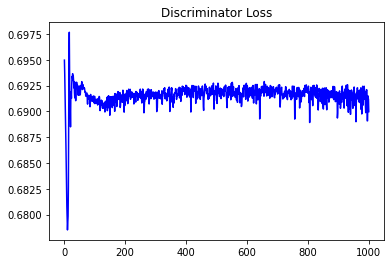

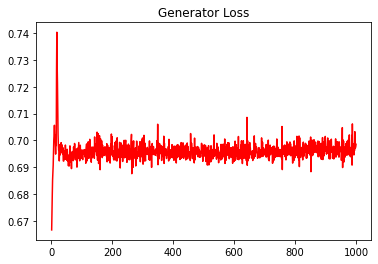

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.04476474303109007


#### Sanity Checks 

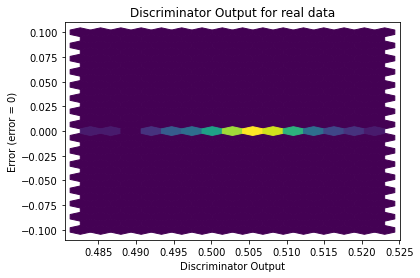

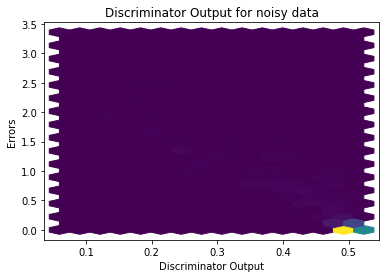

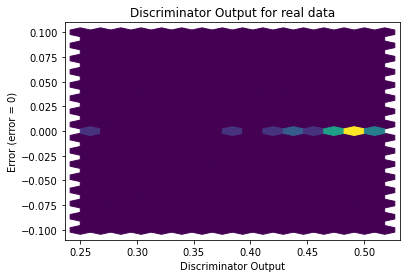

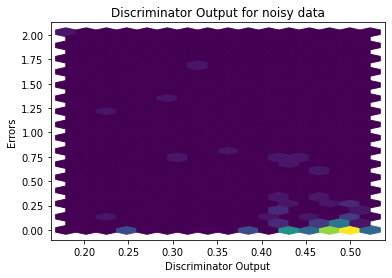

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


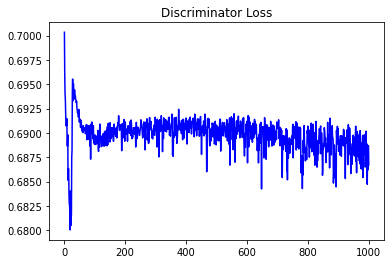

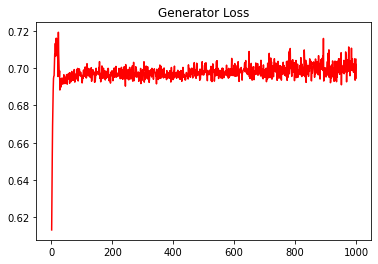

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05351227890895227


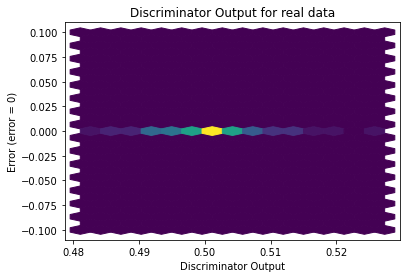

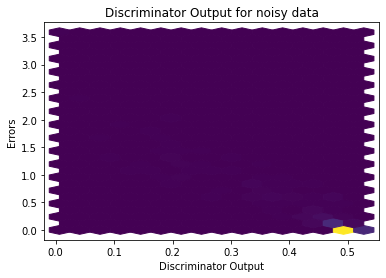

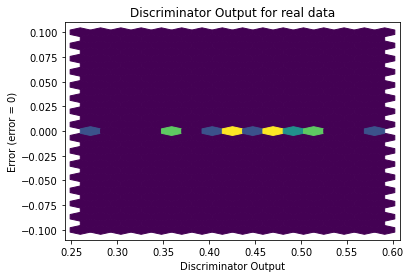

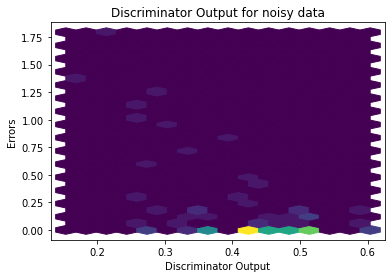

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1630]], device='cuda:0', requires_grad=True)
